In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
accuracy_score,
confusion_matrix,
classification_report,
roc_auc_score
)

In [6]:
df=pd.read_csv("diabetes.csv")

In [7]:
#Replacing invalid zero values with median
cols_with_zero=["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [11]:
for col in cols_with_zero:
    df[col]= df[col].replace(0, np.nan)
    df[col]= df[col].replace(0, df[col].median())

In [12]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      27.334635   94.652344   
std    

In [13]:
print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


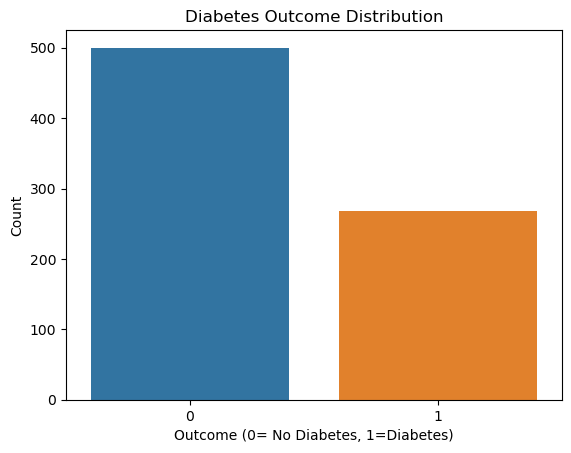

In [14]:
#Target Variable Distribution
plt.figure()
sns.countplot(x="Outcome", data=df)
plt.title("Diabetes Outcome Distribution")
plt.xlabel("Outcome (0= No Diabetes, 1=Diabetes)")
plt.ylabel("Count")
plt.show()

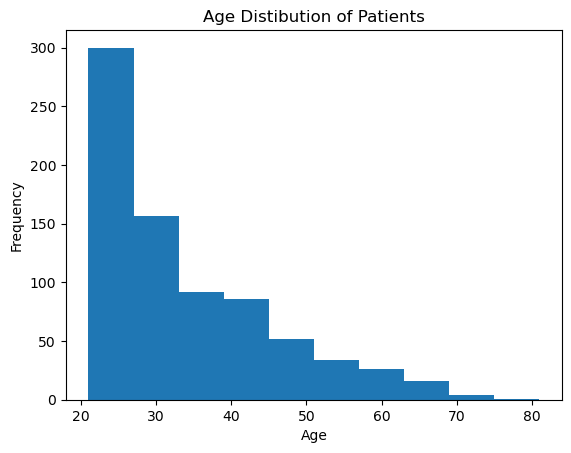

In [15]:
#Age Distirbution
plt.figure()
plt.hist(df["Age"], bins=10)
plt.title("Age Distibution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

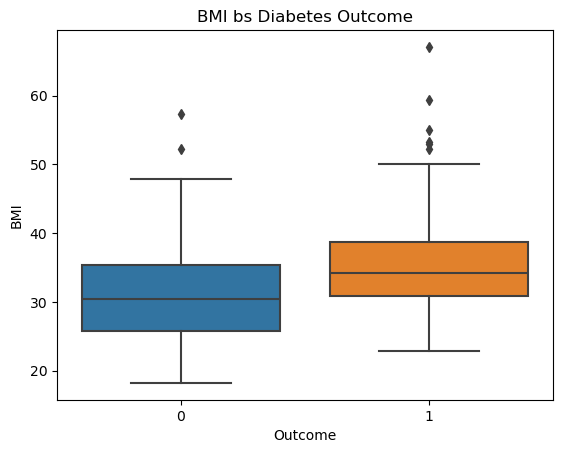

In [17]:
#BMI vs Diabetes Outcome
plt.figure()
sns.boxplot(x="Outcome", y="BMI", data=df)
plt.title("BMI bs Diabetes Outcome")
plt.xlabel("Outcome")
plt.ylabel("BMI")
plt.show()

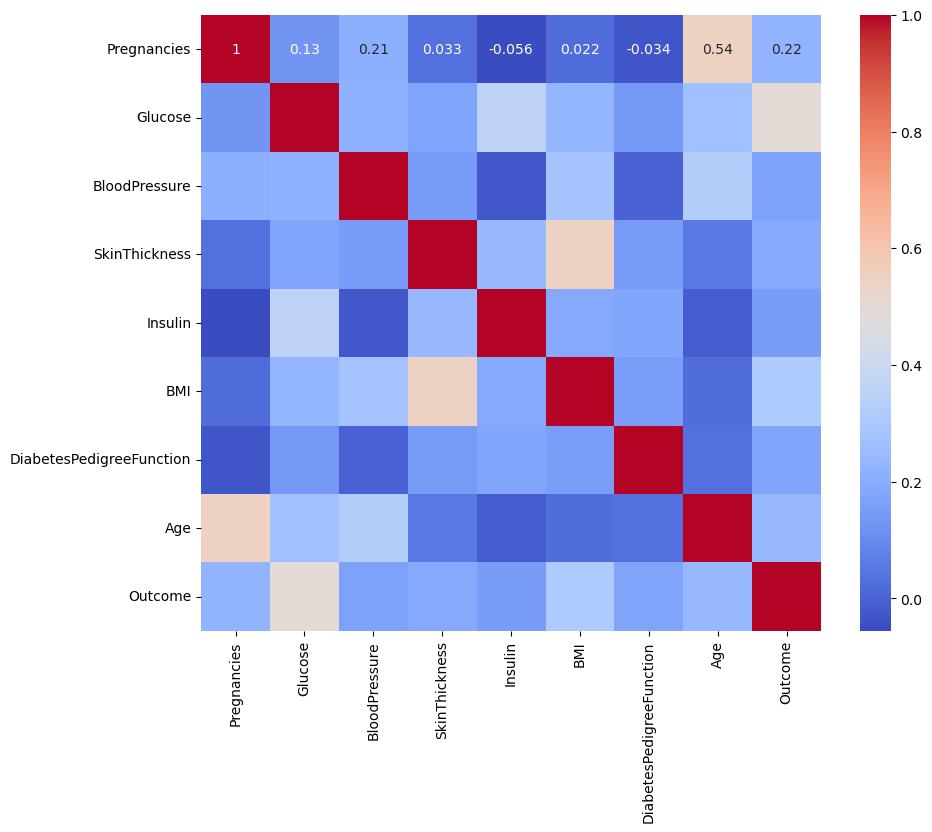

In [30]:
#Correlation Analysis
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [31]:
#Comparing average feature values by diabetes outcome
grouped_stats= df.groupby("Outcome").mean()
print("\nAverage Feature Values by Outcome:\n")
print(grouped_stats)


Average Feature Values by Outcome:

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.682000      70.920000      26.058000   83.188000   
1           4.865672  142.130597      75.123134      29.716418  116.041045   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.880200                  0.429734  31.190000  
1        35.381343                  0.550500  37.067164  


In [32]:
#Feature Selection
X= df.drop("Outcome", axis=1)
y= df["Outcome"]

In [33]:
#Train-Test Split
X_train, X_test, y_train, y_test= train_test_split(
    X,y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
#Scaling
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [35]:
#Model Training
model= LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [36]:
y_pred= model.predict(X_test_scaled)
y_prob= model.predict_proba(X_test_scaled)[:,1]

In [37]:
print("Accuray:", accuracy_score(y_test,y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuray: 0.7077922077922078
ROC-AUC Score: 0.8151851851851852

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

